<a href="https://colab.research.google.com/github/gyuholee94/NLP/blob/master/NLP_%EC%97%B0%EC%8A%B5_9_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")



--2020-08-13 01:10:56--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.97.128, 74.125.203.128, 64.233.189.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2020-08-13 01:10:56 (114 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [5]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) +1
input_sequences = []
for line in corpus : 
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_sequence = token_list[:i+1]
    input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len))

In [6]:
xs, label = input_sequences[:, :-1], input_sequences[:, -1]
label = ku.to_categorical(label, num_classes = total_words)

In [7]:
len(corpus)

2159

In [9]:
max_sequence_len

11

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [15]:
history = model.fit(xs, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 13s 27ms/step - loss: 6.9094 - accuracy: 0.0200
Epoch 2/100
484/484 [==============================] - 13s 27ms/step - loss: 6.5037 - accuracy: 0.0233
Epoch 3/100
484/484 [==============================] - 13s 27ms/step - loss: 6.3962 - accuracy: 0.0244
Epoch 4/100
484/484 [==============================] - 13s 27ms/step - loss: 6.2708 - accuracy: 0.0286
Epoch 5/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1838 - accuracy: 0.0333
Epoch 6/100
484/484 [==============================] - 13s 27ms/step - loss: 6.1049 - accuracy: 0.0363
Epoch 7/100
484/484 [==============================] - 13s 27ms/step - loss: 6.0353 - accuracy: 0.0416
Epoch 8/100
484/484 [==============================] - 13s 27ms/step - loss: 5.9556 - accuracy: 0.0422
Epoch 9/100
484/484 [==============================] - 13s 27ms/step - loss: 5.8700 - accuracy: 0.0490
Epoch 10/100
484/484 [==============================] - 13s 27ms/step - l

Text(0.5, 1.0, 'Training loss')

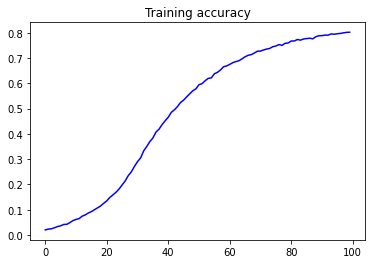

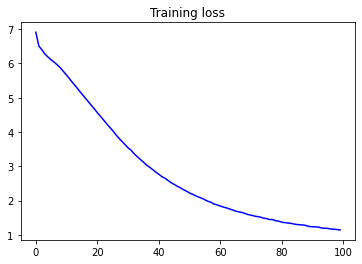

In [16]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')

plt.legend()
plt.show()

In [17]:
seed_text = "Help me Obi WanKenobi, you're my only hope"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_len-1)
  predicted = model.predict_classes(token_list)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break

  seed_text += " "  + output_word
print(seed_text)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Help me Obi WanKenobi, you're my only hope may pleasure stay his friend must be his treasure kind ' new pride thee new grew thee o'er thorns do done thee again lack abused groan new o'er leave me not twain afford lie new me new o'er thee in thee more must prove thee prove foes pain thee long bring thee o'er you bad you bad before thee bold not new grow new rage can new day say new not not not whom thee of thee told new none now groan forth young thee say 'tis art untrue thee made it lack him in thine all not thee we
